<a href="https://colab.research.google.com/github/vvvipindsm/Deep-Learning-for-Candle-Stick-Patterns-Identification/blob/master/PCA%2BAir%2BPollution%2B_283_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/vipinv/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
#Read the data
df = pd.read_excel("Delhi_Pollution_data.xlsx")

In [ ]:
#Check the first few observations
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101,Moderate
1,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114,Moderate
2,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233,Poor
3,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196,Moderate
4,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112,Moderate


In [ ]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2009 non-null   float64       
 3   PM10        2009 non-null   float64       
 4   NO          2009 non-null   float64       
 5   NO2         2009 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2009 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         2009 non-null   float64       
 10  O3          2009 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  Xylene      2009 non-null   float64       
 14  AQI         2009 non-null   int64         
 15  AQI_Bucket  2009 non-null   object        
dtypes: datetime64[ns](1), fl

In [ ]:
#Check for presence of duplicate rows
df.duplicated().sum()

0

In [ ]:
#Check for presence of missing values in each feature
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
#Note: AQI and AQI_Bucket are dependent features
#Drop all columns other than the ones suitable for PCA
df_pca = df.drop(['City', 'Date', 'AQI', 'AQI_Bucket'], axis = 1)

In [ ]:
#Dataframe suitable for PCA
df_pca.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65
1,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49
2,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13
3,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74
4,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43
5,50.01,112.08,9.67,22.06,21.75,32.64,1.01,11.66,24.82,2.07,23.31,0.70
6,38.37,77.76,9.33,21.41,21.17,30.48,1.02,11.28,25.92,1.59,19.18,0.49
7,30.91,62.61,6.63,16.84,15.72,31.45,0.89,11.02,24.77,1.28,12.13,0.27
8,29.02,64.12,6.22,16.39,15.33,33.32,0.88,11.09,28.64,1.25,12.99,0.33
9,39.47,77.48,5.67,20.61,17.46,34.32,0.91,11.08,42.76,1.54,18.47,0.37


In [ ]:
#Check the number of features
len(df_pca.columns)

12

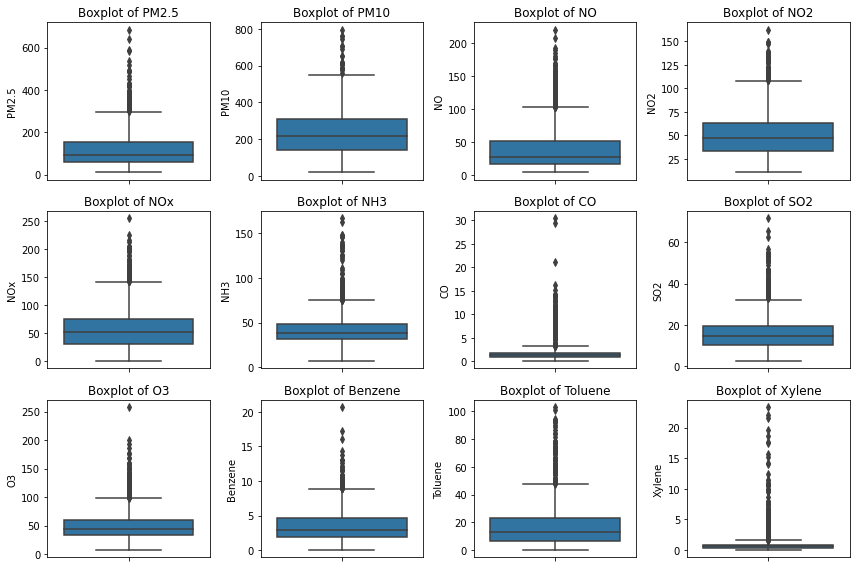

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

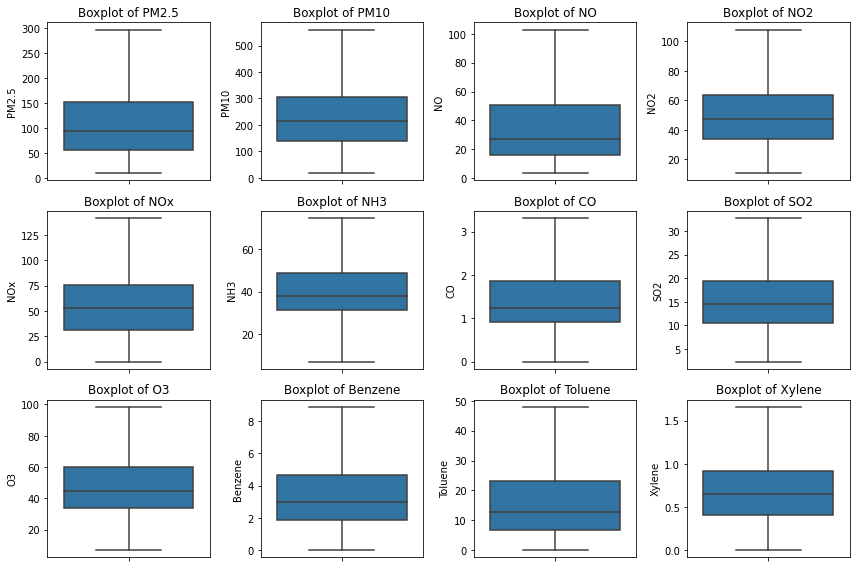

In [ ]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
#Check the descriptive stats to observe scale issues between the variables
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,2009.0,114.304358,73.207550,10.24,57.10,94.62,152.99,296.825
PM10,2009.0,231.283146,116.454530,18.59,138.81,216.73,307.38,560.235
NO,2009.0,37.080572,27.868734,3.57,15.90,27.20,50.72,102.950
NO2,2009.0,50.418793,21.533088,10.63,33.90,47.15,63.57,108.075
NOx,2009.0,57.594064,34.831204,0.00,31.15,52.75,75.36,141.675
NH3,2009.0,41.004778,13.629083,6.78,31.22,38.04,48.68,74.870
CO,2009.0,1.457427,0.856552,0.00,0.91,1.24,1.87,3.310
SO2,2009.0,15.465983,6.480297,2.34,10.46,14.45,19.36,32.710
O3,2009.0,49.570667,20.892250,6.94,34.08,44.44,59.88,98.580
Benzene,2009.0,3.480214,2.228740,0.00,1.87,2.96,4.68,8.895


In [ ]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [ ]:
#Check the data post scaling
df_pca_scaled.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-0.823814,-0.881449,-1.103682,-1.364231,-1.171197,-0.876637,-0.569198,-0.666182,-0.949903,-0.650850,0.571394,-0.164550
1,-1.017968,-1.196500,-1.115885,-1.507767,-1.210540,-0.919203,-0.721007,-0.764968,-0.587956,-0.857296,0.000887,-0.470643
2,-0.948832,-0.405093,-0.954015,-1.340076,-1.023879,-0.956633,-0.674297,-0.599811,-1.099278,-0.605970,0.589619,0.753730
3,-0.748529,0.664518,-0.876131,-1.338682,-0.968742,-0.861224,-0.604231,-0.735641,-1.509101,-0.794465,0.695004,1.767664
4,-1.017968,-0.647136,-0.940376,-1.345186,-1.008659,-0.702700,-0.685974,-0.785033,-1.469363,-0.803441,0.287725,-0.585428


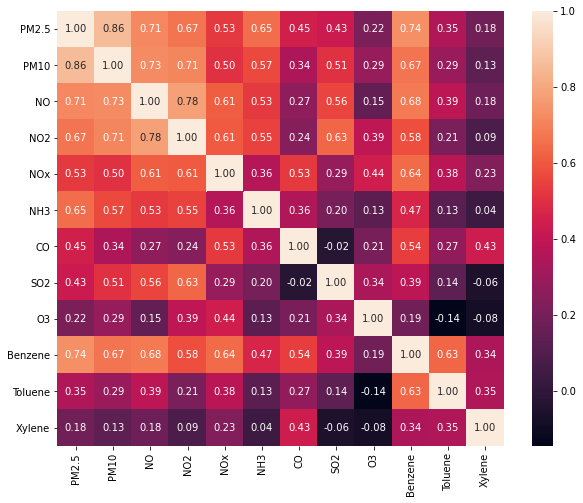

In [ ]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_scaled.corr(), annot=True,fmt='.2f');

In [ ]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [ ]:
#Confirm the adequacy of sample size.
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.8376519436323343

In [ ]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [ ]:
#Extract eigen vectors
pca.components_

array([[ 0.36757983,  0.35874864,  0.3586897 ,  0.34856375,  0.31661476,
         0.27264851,  0.22407402,  0.2354441 ,  0.14900296,  0.35967138,
         0.20036925,  0.11870582],
       [ 0.01788055,  0.12180783,  0.07920562,  0.25502423, -0.07185109,
         0.06976372, -0.37463646,  0.38778796,  0.33653904, -0.20718676,
        -0.41848144, -0.53052722],
       [-0.10244197, -0.1082965 , -0.23877719, -0.02680145,  0.329494  ,
        -0.04259609,  0.46126311, -0.1934286 ,  0.65938621, -0.06805854,
        -0.32861601,  0.10988637],
       [ 0.2517615 ,  0.14172243, -0.04998115, -0.05800976, -0.19614686,
         0.64557842,  0.21025355, -0.42214395, -0.25004424, -0.10221822,
        -0.35987447, -0.17472887],
       [-0.02951417, -0.10587218, -0.06664532, -0.15232101,  0.3156141 ,
         0.03492092,  0.00652305, -0.27840717,  0.07088788,  0.1881715 ,
         0.44708658, -0.73591565],
       [-0.33778676, -0.35252369,  0.38787525,  0.34686121,  0.49700404,
         0.18451077, -

In [ ]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.71418983, 1.73516949, 1.14758734, 0.95455182, 0.63944041,
       0.46998204, 0.36503474, 0.34686872, 0.1906889 , 0.16883957,
       0.15442402, 0.11919921])

In [ ]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.47594546, 0.14452548, 0.09558468, 0.07950639, 0.05326018,
       0.03914568, 0.03040442, 0.02889134, 0.01588283, 0.01406296,
       0.01286226, 0.00992832])

In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = df_pca_scaled.columns)

In [ ]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PM2.5,0.367580,0.017881,-0.102442,0.251761,-0.029514,-0.337787,0.065633,0.275665,0.086309,-0.123236,-0.164356,0.738761
PM10,0.358749,0.121808,-0.108297,0.141722,-0.105872,-0.352524,0.123756,0.469464,-0.192561,-0.218866,0.015977,-0.606809
NO,0.358690,0.079206,-0.238777,-0.049981,-0.066645,0.387875,-0.144580,0.198196,0.126583,0.155804,0.736009,0.092056
NO2,0.348564,0.255024,-0.026801,-0.058010,-0.152321,0.346861,0.022629,-0.052348,-0.576914,0.421731,-0.385366,0.058499
NOx,0.316615,-0.071851,0.329494,-0.196147,0.315614,0.497004,-0.093880,0.218380,0.227118,-0.446437,-0.302527,-0.044863
NH3,0.272649,0.069764,-0.042596,0.645578,0.034921,0.184511,0.277003,-0.566976,0.115428,-0.193869,0.039794,-0.127519
CO,0.224074,-0.374636,0.461263,0.210254,0.006523,-0.203209,-0.607033,-0.152714,-0.298226,0.032584,0.170692,-0.013601
SO2,0.235444,0.387788,-0.193429,-0.422144,-0.278407,-0.223017,-0.365280,-0.437689,0.135554,-0.322230,-0.063257,-0.010476
O3,0.149003,0.336539,0.659386,-0.250044,0.070888,-0.218104,0.448666,-0.101397,-0.002582,0.103173,0.293715,0.078303
Benzene,0.359671,-0.207187,-0.068059,-0.102218,0.188172,-0.207380,-0.020012,-0.090417,0.531238,0.589204,-0.224580,-0.214074


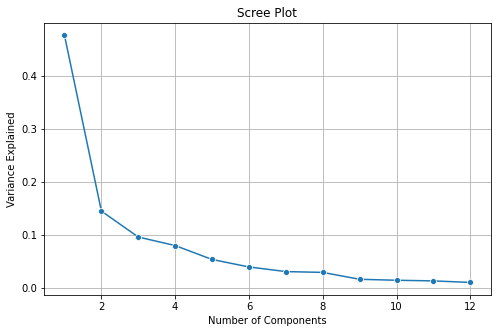

In [ ]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [ ]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.47594546, 0.62047094, 0.71605562, 0.79556201, 0.84882219,
       0.88796786, 0.91837228, 0.94726362, 0.96314645, 0.97720941,
       0.99007168, 1.        ])

In [ ]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [ ]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
PM2.5,0.367580,0.017881,-0.102442,0.251761,-0.029514
PM10,0.358749,0.121808,-0.108297,0.141722,-0.105872
NO,0.358690,0.079206,-0.238777,-0.049981,-0.066645
NO2,0.348564,0.255024,-0.026801,-0.058010,-0.152321
NOx,0.316615,-0.071851,0.329494,-0.196147,0.315614
NH3,0.272649,0.069764,-0.042596,0.645578,0.034921
CO,0.224074,-0.374636,0.461263,0.210254,0.006523
SO2,0.235444,0.387788,-0.193429,-0.422144,-0.278407
O3,0.149003,0.336539,0.659386,-0.250044,0.070888
Benzene,0.359671,-0.207187,-0.068059,-0.102218,0.188172


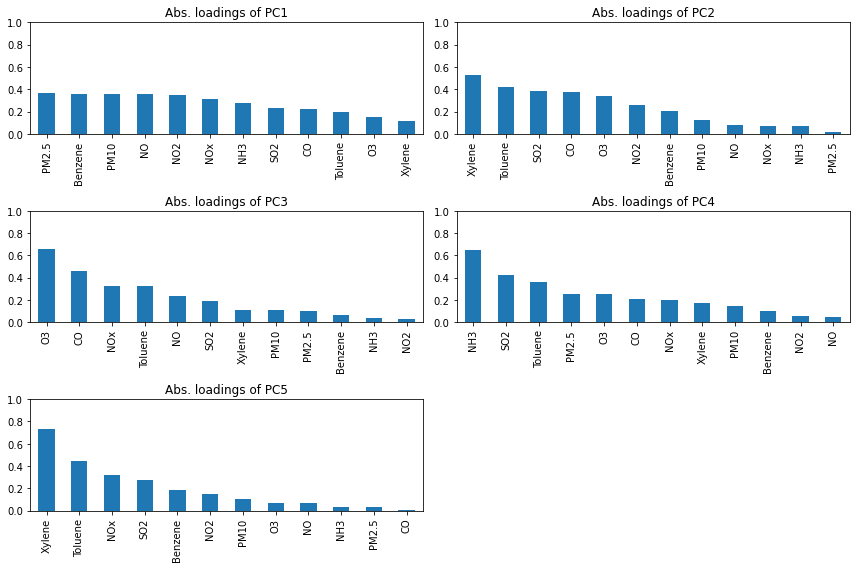

In [ ]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

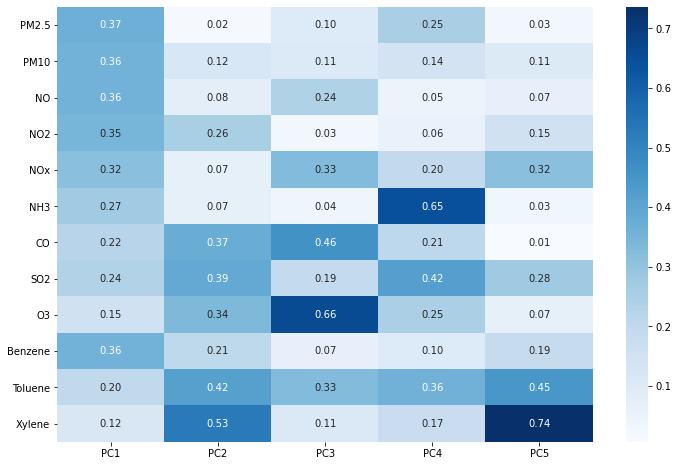

In [ ]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [ ]:
#In order to calculate PC scores we need loadings, below:
df_selected

,PC1,PC2,PC3,PC4,PC5
PM2.5,0.367580,0.017881,-0.102442,0.251761,-0.029514
PM10,0.358749,0.121808,-0.108297,0.141722,-0.105872
NO,0.358690,0.079206,-0.238777,-0.049981,-0.066645
NO2,0.348564,0.255024,-0.026801,-0.058010,-0.152321
NOx,0.316615,-0.071851,0.329494,-0.196147,0.315614
NH3,0.272649,0.069764,-0.042596,0.645578,0.034921
CO,0.224074,-0.374636,0.461263,0.210254,0.006523
SO2,0.235444,0.387788,-0.193429,-0.422144,-0.278407
O3,0.149003,0.336539,0.659386,-0.250044,0.070888
Benzene,0.359671,-0.207187,-0.068059,-0.102218,0.188172


In [ ]:
#...and we need the original scaled features
df_pca_scaled.iloc[0]

PM2.5     -0.823814
PM10      -0.881449
NO        -1.103682
NO2       -1.364231
NOx       -1.171197
NH3       -0.876637
CO        -0.569198
SO2       -0.666182
O3        -0.949903
Benzene   -0.650850
Toluene    0.571394
Xylene    -0.164550
Name: 0, dtype: float64

In [ ]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-2.665334 -0.91618 -0.790212 -0.245518 0.367239 

In [ ]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [ ]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-2.665334,-0.916180,-0.790212,-0.245518,0.367239
1,-3.156439,-0.411456,-0.384953,-0.150697,0.398613
2,-2.354841,-1.347799,-0.881378,-0.483265,-0.338393
3,-1.829266,-1.964523,-1.144289,-0.255720,-1.167517
4,-2.781773,-0.676409,-1.105102,0.156680,0.541447
5,-2.552951,-1.016836,-0.896148,-0.122146,0.308240
6,-2.974647,-0.688794,-0.713432,-0.076641,0.467709
7,-3.461293,-0.243401,-0.666444,0.260655,0.516457
8,-3.394853,-0.254105,-0.564833,0.252188,0.474779
9,-2.949465,-0.223915,-0.256325,-0.014562,0.662630


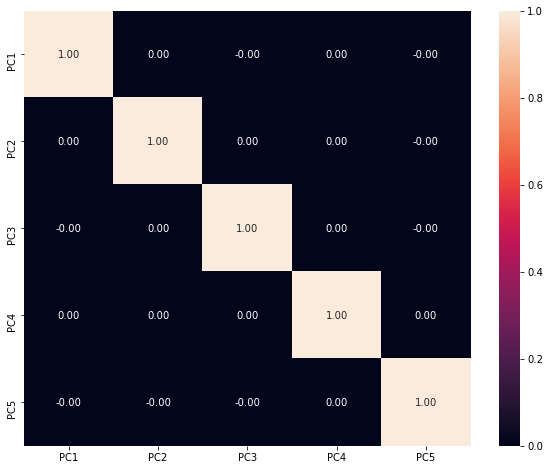

In [ ]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');